# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Получение данных


#### Загрузка и просмотр данных

In [ ]:
# импортируем необходимые библиотеки и посмотрим 10 первых строк таблицы

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
df = pd.read_csv('/content/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных таблицы df, применив метод info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Названия столбцов приемлемы для работы, за ислючением столбца `cityCenters_nearest`. Изменим регистр букв на нижний

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
# узнаем уровень разброса значений в исследуемых данных
df.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


#### Вывод. Рассмотрим полученную информацию подробнее  

В таблице представлены 22 столбца, содержащих информацию о проданных квартирах, их параметрах. Мы видим следующие данные

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- citycenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


Исходя из цели исследования, нам необходимо обратить особое внимание на следующие параметры: living_area — **жилая площадь** в квадратных метрах(м²), last_price — **цена** на момент снятия с публикации, rooms - **число комнат**, ceiling_height - **высота потолков** (м). Это важные столбцы, на которые нам необходимо обратить пристальное внимание и максимально сохранить данные (*число строк в таблице - 23699, хотелось бы чтобы так и оставалось*). Нам важны и следующие столбцы: days_exposition — **сколько дней** было размещено объявление (от публикации до снятия), citycenters_nearest — **расстояние до центра** города (м), locality_name — **название населённого пункта**. Вышеназванные столбцы необходимы нам для ответа на поставленные вопросы. постараемся максимально сохранить данные при обработке. 
Разброс данных показал нам, что в таблице присутствуют аномальные значения, например максимальное значение высоты потолка - **100 м** (*прямо как в песне - Наша крыша — небо голубое*). Возможно это ошибка записи и верное значение - 10.0 м. Построим гистограммы для визуализации значений в первоначальном дата сете




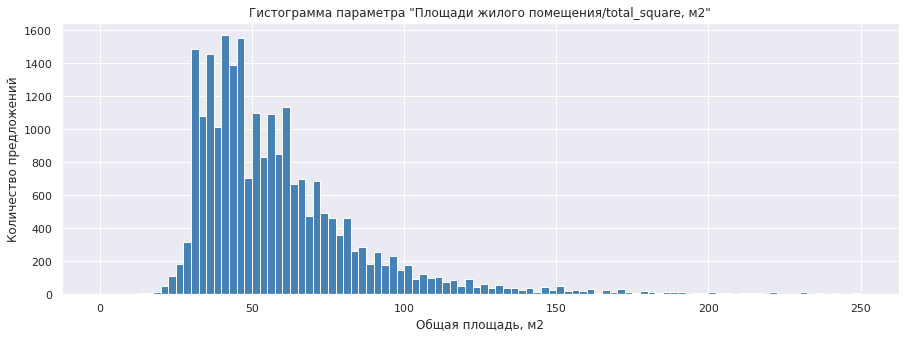

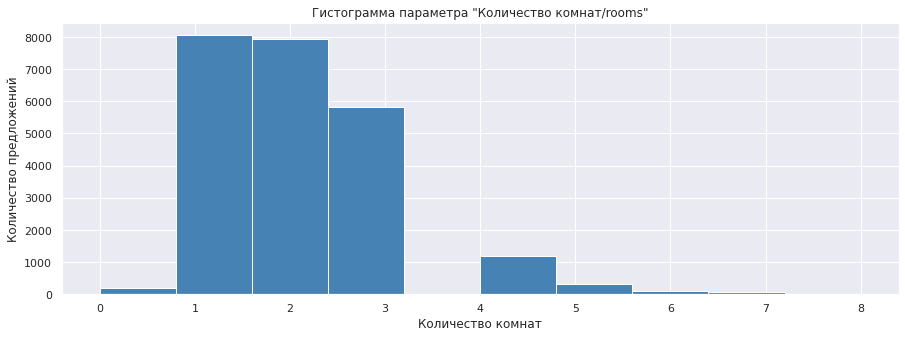

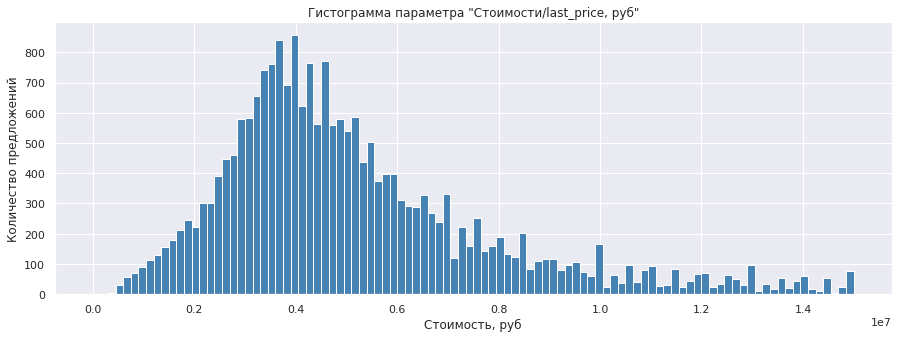

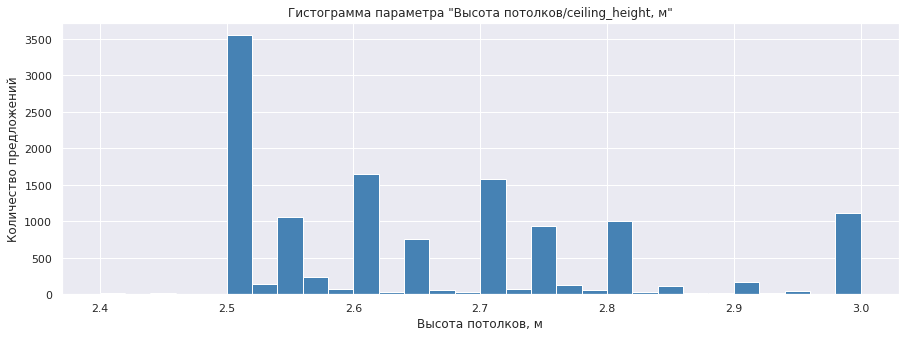

In [ ]:
sns.set(style="darkgrid")
df.hist('total_area', bins=100, range = (0, 250), color='steelblue', figsize=(15,5), grid=True)
plt.title('Гистограмма параметра "Площади жилого помещения/total_square, м2"')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Количество предложений')
plt.show()
df.hist('rooms', bins=10, range = (0, 8), color='steelblue', figsize=(15,5), grid=True)
plt.title('Гистограмма параметра "Количество комнат/rooms"')
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()
df.hist('last_price', bins=100, range = (0, 15000000), color='steelblue', figsize=(15,5), grid=True)
plt.title('Гистограмма параметра "Стоимости/last_price, руб"')
plt.xlabel('Стоимость, руб')
plt.ylabel('Количество предложений')
plt.show()
df.hist('ceiling_height', bins=30, range = (2.4, 3), color='steelblue', figsize=(15,5), grid=True)
plt.title('Гистограмма параметра "Высота потолков/ceiling_height, м"')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество предложений')
plt.show()


Нам необходимо проверить сет на пропуски, дубликаты, аномальные значения и принять решение, что мы с ними делаем, стараясь максимально сохранить исходный объем данных. Гистограммы по текущим данным выглядят приемлемо. Большинство значений не выбивается, есть отклонения, которые мы выявили методом `describe ()`.
Необходимо перейти к предобработке, а также посмотреть диаграммы рассеивания, и примем решение с чем продолжим работу. Цель - максимально сохранить данные, но минимизировать вхождения мусорных значений в анализ.

### Предобработка данных

#### Установим наличие дубликатов в сете данных. Если найдутся - удаляем и проверим все ли удалили


In [ ]:
df.duplicated().sum()

0

##### Вывод 

Дубликатов в сете не обнаружено. Мы можем переходить к обработке пропусков

#### Подсчет пропусков и их обработка

##### Подсчет пропусков и визуализация долей

In [ ]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
citycenters_nearest     0.232879
parks_around3000        0.232837
ponds_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
first_day_exposition    0.000000
last_price              0.000000
total_area              0.000000
studio                  0.000000
rooms                   0.000000
floor                   0.000000
open_plan               0.000000
total_images            0.000000
dtype: float64

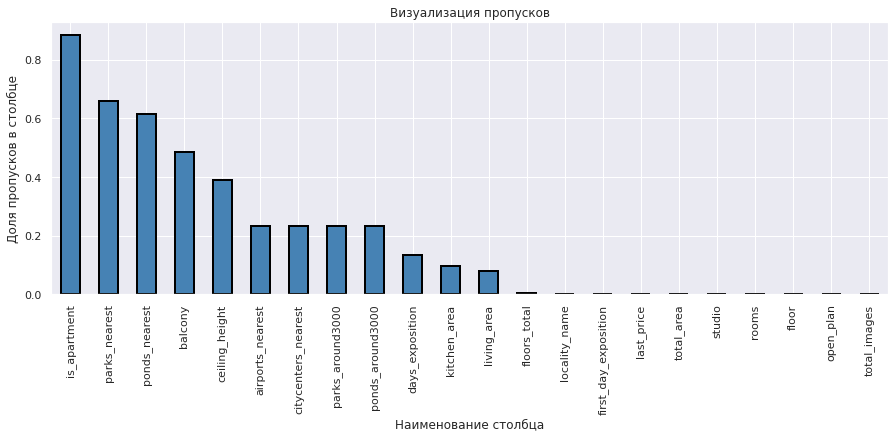

In [ ]:

df.isna().mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(15,5), 
    grid=True, color='steelblue', 
    edgecolor='black', linewidth=2
)
plt.title('Визуализация пропусков')
plt.xlabel('Наименование столбца')
plt.ylabel('Доля пропусков в столбце')
plt.show()

Пропусков много. Давайте проверять по столбца от большего к меньшему. По итогу сформируем дата сет для анализа из нашего `df`, с которым продолжим работать 


###### Столбец `is_apartment`

In [ ]:
print('Количество пропусков в столбце "is_apartment":', df['is_apartment'].isna().sum())
df['is_apartment'].value_counts()

Количество пропусков в столбце "is_apartment": 20924


False    2725
True       50
Name: is_apartment, dtype: int64

Менять пропуски **не будем**. Обратим на данный столбец внимание. Если поменяем на `False` - можем исказить данные, если будем проводить анализ влияния типа жилой площади на цену, как пример. В нашем дата сате всего 50 аппартаментов, при этом внешние источники [говорят](https://realty.rbc.ru/news/5e4a6e7e9a794715a62ce441#:~:text=%D0%92%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82%2D%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B5%20%D0%B7%D0%B0%20%D0%B3%D0%BE%D0%B4,%D0%BA%D0%B2.), что апартаментов в продаже гораздо больше могло находиться в тот момент. Будем считать, что пропуски зависят от неизвестных факторов - *Missing Not At Random*. Могли их восстановить по статусу регистрации, например, возможности получения [налогового вычета](https://realty.rbc.ru/news/5fc897769a7947df26e675e9) Данный столбец в анализе использовать не будем. При желании мы можем анализировать на значениях, где они точно есть, но считаю выборку непоказательной

###### Столбцы `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`, `airports_nearest`

In [ ]:
print('Доля пропусков внутри столбца "parks_nearest": {:.2%}'.format(df['parks_nearest'].isna().sum()/len(df)))
print('Доля пропусков внутри столбца "ponds_nearest": {:.2%}'.format(df['ponds_nearest'].isna().sum()/len(df)))
print('Доля пропусков внутри столбца "parks_around3000": {:.2%}'.format(df['parks_around3000'].isna().sum()/len(df)))
print('Доля пропусков внутри столбца "ponds_around3000": {:.2%}'.format(df['ponds_around3000'].isna().sum()/len(df)))
print('Доля пропусков внутри столбца "airports_nearest": {:.2%}'.format(df['airports_nearest'].isna().sum()/len(df)))

Доля пропусков внутри столбца "parks_nearest": 65.91%
Доля пропусков внутри столбца "ponds_nearest": 61.56%
Доля пропусков внутри столбца "parks_around3000": 23.28%
Доля пропусков внутри столбца "ponds_around3000": 23.28%
Доля пропусков внутри столбца "airports_nearest": 23.38%


Менять пропуски **не будем**. Восстановить можно было бы по сравнению геопозиции каждого отдельного объекта с картой. Данные заполнялись системой, возможно были допущены ошибки. Обратим на это внимание. Так как задачи не стоит определить взаимосвязь цены объекта и скорости продажи от этих характеристик, необходимо заменять NaN нет. Интересен тот факт, что количество пропусков в столбцах parks_around3000, ponds_around3000 и airports_nearest - идентичен.

In [ ]:
(
    df[(df['parks_around3000'].isna() == True) & (
    df['ponds_around3000'].isna() == True) & (
    df['airports_nearest'].isna() == True)].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518 entries, 5 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          5518 non-null   int64  
 1   last_price            5518 non-null   float64
 2   total_area            5518 non-null   float64
 3   first_day_exposition  5518 non-null   object 
 4   rooms                 5518 non-null   int64  
 5   ceiling_height        2943 non-null   float64
 6   floors_total          5508 non-null   float64
 7   living_area           4895 non-null   float64
 8   floor                 5518 non-null   int64  
 9   is_apartment          628 non-null    object 
 10  studio                5518 non-null   bool   
 11  open_plan             5518 non-null   bool   
 12  kitchen_area          4803 non-null   float64
 13  balcony               2808 non-null   float64
 14  locality_name         5510 non-null   object 
 15  airports_nearest    

Так и есть. Видимо есть некоторая ошибка в алгоритме проставления данных для столбцов:
 - airports_nearest        
 - citycenters_nearest     
 - parks_around3000        
 - parks_nearest           
 - ponds_around3000       
 - ponds_nearest           

также мы выяснили, что важный нам столбец `citycenters_nearest` также будет содержать пропуски. Вернемся к нему позже

###### Столбец `balcony`


In [ ]:
print('Доля пропусков внутри столбца "balcony": {:.2%}'.format(df['balcony'].isna().sum()/len(df)))
df['balcony'].value_counts()

Доля пропусков внутри столбца "balcony": 48.61%


1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Предположим, что пропуски здесь образовались по механизму *MCAR*, то есть фактически - если балкона нет - то и ответ не давался. Соответственно в этом случае `NaN` можем заменить на `0`. Балкон достаточно важная характеристика при продаже недвижимости, поэтому ее отсутствие в данных - скорее признак отсутствия физически

###### Столбец `ceiling_height`

Данный столбец необходим для анализа. На него стоит обратить внимание:


In [ ]:
print('Доля пропусков внутри столбца "ceiling_height": {:.2%}'.format(df['ceiling_height'].isna().sum()/len(df)))

Доля пропусков внутри столбца "ceiling_height": 38.80%


Методом `describe()` ранее мы выяснили, что в данном столбце находятся артефакты - есть потолки как 1.26 метра, так и 100 м.
Найдм среднее и медианное значение по столбцу. Гистаграмма показала, что в целом разброс не сильно велик:


In [ ]:
print(df['ceiling_height'].mean())
print(df['ceiling_height'].median())

2.7714988968559835
2.65


Обратимся к [СНиП 31-01-2003 Здания жилые многоквартирные](http://docs.cntd.ru/document/1200035248): 

*5.8 Высота (от пола до потолка) жилых помещений и кухни (кухни-столовой) в климатических районах IА, IБ, IГ, IД и IVA должна быть не менее **2,7** м, а в других климатических районах - не менее **2,5** м.

Высота внутриквартирных коридоров, холлов, передних, антресолей (и под ними) определяется условиями безопасности передвижения людей и должна составлять не менее 2,1 м.

В жилых помещениях и кухне квартир, расположенных в мансардном этаже (или верхних этажах с наклонными ограждающими конструкциями), допускается меньшая высота потолка относительно нормируемой на площади, не превышающей 50%.*


Что мы видим: средняя и медиана находятся в рамках СНиП. Можно заменить пропуски на Медиану, так как она находится как раз между нормативными значениями в 2.5 и 2.7 метра, а среднее превышает (что связано с артефактами)

Заменим NaN на медианное значение. Считаем, что пропуски появились случайно, возможно вопрос не завадся *(MCAR)*

###### Столбец `locality_name`

In [ ]:
print('Доля пропусков внутри столбца "locality_name": {:.2%}'.format(df['locality_name'].isna().sum()/len(df)))

Доля пропусков внутри столбца "locality_name": 0.21%


Столбец важен для анализа. Но количество пропусков незначительное. Данные отсутствуют по неизвестным причинам, преположим - софрмированы по механизму MNAR. Могли бы восстановить по геопозиции, но данных в сете нет. Предлагаю заменить `NaN` на `Неизвестно` (русский язык для сохранения стиля столбца)

###### Столбец `citycenters_nearest`

In [ ]:
print('Доля пропусков внутри столбца "citycenters_nearest": {:.2%}'.format(df['citycenters_nearest'].isna().sum()/len(df)))

Доля пропусков внутри столбца "citycenters_nearest": 23.29%


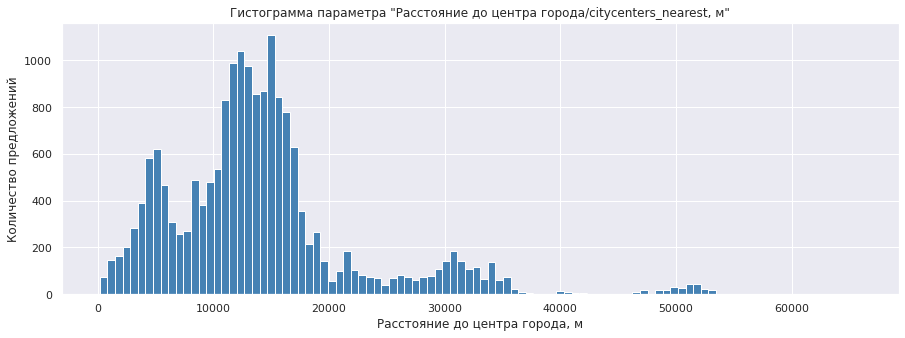

In [ ]:
df['citycenters_nearest'].hist(bins=100, color='steelblue', figsize=(15, 5))
plt.title('Гистограмма параметра "Расстояние до центра города/citycenters_nearest, м"')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Количество предложений')
plt.show()

Как мы выяснили, все автоматические данные пропущены (см. пункт 2.2.1.2). Столбец важен для анализа. Данные отсутствуют по неизвестным причинам, преположим - софрмированы по механизму MNAR. Могли бы восстановить по геопозиции, но данных в сете нет. Предлагаю `NaN` за менить на `0` и эти данные исключать при выборке **(используя строгие неравества)**

###### Столбец `days_exposition`

In [ ]:
print('Доля пропусков внутри столбца "days_exposition": {:.2%}'.format(df['days_exposition'].isna().sum()/len(df)))

Доля пропусков внутри столбца "days_exposition": 13.42%


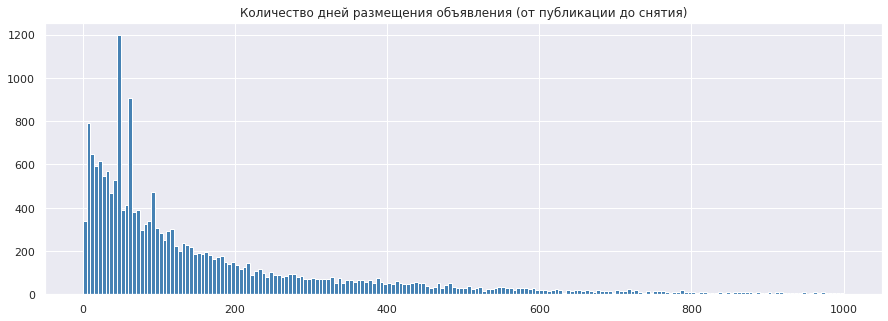

In [ ]:
df['days_exposition'].hist(bins=200, color='steelblue', figsize=(15, 5), range=(0, 1000))
plt.title('Количество дней размещения объявления (от публикации до снятия)')
plt.show()

Срок продажи очень важен нам для анализа. Но восстановить эти данные мы не можем. Сформированы по механизму MNAR - мы могли бы их восстановить зная начальную и конечную дату продажи или снятия объявления. Возможно пропуски обусловлены ошибочным размещением или объявлениями, которые были сняты в тот же день и это означает 0. Предлагаю `NaN` за менить на `0` и эти данные исключать при выборке **(используя строгие неравества)**

###### Столбцы `kitchen_area`, `living_area`

In [ ]:
print('Доля пропусков внутри столбца "kitchen_area": {:.2%}'.format(df['kitchen_area'].isna().sum()/len(df)))
print('Доля пропусков внутри столбца "living_area": {:.2%}'.format(df['living_area'].isna().sum()/len(df)))

Доля пропусков внутри столбца "kitchen_area": 9.61%
Доля пропусков внутри столбца "living_area": 8.03%


In [ ]:
print(df['kitchen_area'].corr(df['living_area'])) # корреляция между площадью кухни и жилой площадью
print(df['kitchen_area'].corr(df['total_area'])) # корреляция между площадью кухни и общей площадью
print(df['living_area'].corr(df['total_area'])) # корреляция между жилой площадью и общей площадью

0.42867430668441225
0.6091211711198314
0.9395373338721491


Что мы видим. Между площадью кухни и жилой площадью наблюдается слабая корреляция. Между площадью кухни и общей площадью квартиры - средняя. Сильная корреляция наблюдается между жилой площадью и площадью общей. Думаю пропуски носят полностью случайный характер *(MCAR)*. Предлагаю `NaN` за менить на `0` и эти данные исключать при выборке **(используя строгие неравества)**

###### Столбец `floors_total`

In [ ]:
print('Доля пропусков внутри столбца "floors_total": {:.2%}'.format(df['floors_total'].isna().sum()/len(df)))


Доля пропусков внутри столбца "floors_total": 0.36%


Доля пропусков невелика, можно не учитывать в анализе, но НЕ УДАЛЯТЬ. Предлагаю замену на `0`, при категории попадет в `Другой`. Пропусков немного, искажений это не даст

##### Обработка пропусков

Заменим пропуски и создадим новый сет

In [ ]:
# найдем медиану высоты потолков

ceiling_height_median = df['ceiling_height'].median()

# заполним NaN по интересующим нас столбцам
# создадим словарь значений
values = {'ceiling_height': ceiling_height_median,'floors_total': 0, 
          'balcony': 0, 'living_area': 0, 'kitchen_area': 0, 
          'locality_name': 'Неизвестно', 'days_exposition': 0, 'citycenters_nearest': 0}
df.fillna(value=values, inplace=True)
real_estate = df.drop(['total_images', 
                       'is_apartment', 
                       'studio', 'open_plan', 
                       'airports_nearest',
                       'parks_around3000', 'parks_nearest',
                       'ponds_around3000', 'ponds_nearest'], 1)

real_estate.info()
real_estate.describe()
real_estate.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        23699 non-null  float64
 5   floors_total          23699 non-null  float64
 6   living_area           23699 non-null  float64
 7   floor                 23699 non-null  int64  
 8   kitchen_area          23699 non-null  float64
 9   balcony               23699 non-null  float64
 10  locality_name         23699 non-null  object 
 11  citycenters_nearest   23699 non-null  float64
 12  days_exposition       23699 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.4+ MB


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,citycenters_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,25.0,0.0,Санкт-Петербург,16028.0,0.0
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,11.0,2.0,посёлок Шушары,18603.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,8.3,0.0,Санкт-Петербург,13933.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,0.0,9,0.0,0.0,Санкт-Петербург,6800.0,424.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,41.0,0.0,Санкт-Петербург,8098.0,121.0


Сет новый. Без пропусков. Какие то значения договорились не брать в анализ (например, 0 расстояния до центра) при выборке, но выглядит пока все лучше и строки сохранили на выходе все также 23699.

##### Замена значений

- last_price - приведем к целочисленному значению Int, для исключения подсчета копеек в цене
- citycenters_nearest  - приведем к целочисленному значению Int (нам нужны метры, точность в сантиметрах не требуется)
- total_area - округлим до 1 знака после запятой, тип оставим float (площадь принято считать до 1 знака)
- living_area - округлим до 1 знака после запятой, и приведем к float (площадь принято считать до 1 знака)
- kitchen_area - округлим до 1 знака после запятой,  и приведем к  float (площадь принято считать до 1 знака)
- rooms - приведем к целочисленному значению Int (комнаты должны быть целыми, доли не считаем)
- ceiling_height - округлим до 1 знака после запятой, тип оставим float (высота потолков согласно СНИП принята до 1 знака после запятой)-
- floor - приведем к целочисленному значению Int (этаж - принимает целые значения)
- first_day_exposition - object заменим на datetime (для работы со временем необходимо привести в формат datetime - это позволит нам вынимать интересующие нас параметры)
- floors_total  - object заменим на int (этаж - принимает целые значения)
- balcony - object заменим на int
- days_exposition - object заменим на int, это количество дней, целое число (доли дней нас не интересуют)

In [ ]:
# заменим значения, проведем проверку замены


# приведем часть столбцов к формату int
columns_to_int = ['last_price', 'rooms', 'citycenters_nearest', 
                  'floor', 'floors_total', 'balcony', 'days_exposition']
for column in columns_to_int:
    real_estate[column] = real_estate[real_estate[column].notna()][column].astype('int64')

# приведем часть столбцов в формат float64 и округлим до 1 знака

columns_to_float = ['living_area', 'kitchen_area', 'ceiling_height', 'total_area']

for column in columns_to_float:
    real_estate[column] = real_estate[real_estate[column].notna()][column].astype('float64').round(1)
    
# переведем столбец first_day_exposition в формат datetime

real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

real_estate.info()
real_estate.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  int64         
 1   total_area            23699 non-null  float64       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        23699 non-null  float64       
 5   floors_total          23699 non-null  int64         
 6   living_area           23699 non-null  float64       
 7   floor                 23699 non-null  int64         
 8   kitchen_area          23699 non-null  float64       
 9   balcony               23699 non-null  int64         
 10  locality_name         23699 non-null  object        
 11  citycenters_nearest   23699 non-null  int64         
 12  days_exposition       23699 non-null  int64         
dtypes: datetime64[ns

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,citycenters_nearest,days_exposition
0,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,25.0,0,Санкт-Петербург,16028,0
1,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,11.0,2,посёлок Шушары,18603,81
2,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,8.3,0,Санкт-Петербург,13933,558
3,64900000,159.0,2015-07-24,3,2.6,14,0.0,9,0.0,0,Санкт-Петербург,6800,424
4,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,41.0,0,Санкт-Петербург,8098,121


#### Вывод

Таким образом, мы выделили столбцы для анализа, так или иначе убрали `NaN`, дальнейший анализ будем проводить с помощью диаграмм рассеивания и срезов, исключая аномальные значения. Значения в окончательной таблице `real_estate` привели к необходимым

### Рассчет и добавление в таблицу дополнительных параметров

#### Цена за квадратный метр

In [ ]:
real_estate['price_of_sqm'] = round(real_estate['last_price']/real_estate['total_area'], 1)
real_estate.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,citycenters_nearest,days_exposition,price_of_sqm
0,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,25.0,0,Санкт-Петербург,16028,0,120370.4
1,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,11.0,2,посёлок Шушары,18603,81,82920.8
2,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,8.3,0,Санкт-Петербург,13933,558,92785.7
3,64900000,159.0,2015-07-24,3,2.6,14,0.0,9,0.0,0,Санкт-Петербург,6800,424,408176.1
4,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,41.0,0,Санкт-Петербург,8098,121,100000.0


#### День недели, месяц и год публикации объявления

In [ ]:
real_estate['month'] = real_estate['first_day_exposition'].dt.month
real_estate['year'] = real_estate['first_day_exposition'].dt.year
real_estate['day'] = real_estate['first_day_exposition'].dt.weekday
# привели дни недели к циферным обозначением, 0 для понедельника и 6 для воскресенья
# сделаем более удобный вид, используя словарь

dict_of_weekdays = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 
                    4: 'Fri', 5: 'Sat', 6: 'Sun'}
real_estate['day'] = real_estate['day'].map(dict_of_weekdays)
real_estate.head()


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,citycenters_nearest,days_exposition,price_of_sqm,month,year,day
0,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,25.0,0,Санкт-Петербург,16028,0,120370.4,3,2019,Thu
1,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,11.0,2,посёлок Шушары,18603,81,82920.8,12,2018,Tue
2,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,8.3,0,Санкт-Петербург,13933,558,92785.7,8,2015,Thu
3,64900000,159.0,2015-07-24,3,2.6,14,0.0,9,0.0,0,Санкт-Петербург,6800,424,408176.1,7,2015,Fri
4,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,41.0,0,Санкт-Петербург,8098,121,100000.0,6,2018,Tue


#### Этаж квартиры. Категорирование

In [ ]:
#замену реализуем через .where()
real_estate['floor_cat'] = np.where(real_estate['floor'] == 1, 'первый', 'другой')
real_estate['floor_cat'] = np.where(real_estate['floor'] == real_estate['floors_total'], 
                                     'последний', real_estate['floor_cat']
                                    )

real_estate.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,citycenters_nearest,days_exposition,price_of_sqm,month,year,day,floor_cat
0,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,25.0,0,Санкт-Петербург,16028,0,120370.4,3,2019,Thu,другой
1,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,11.0,2,посёлок Шушары,18603,81,82920.8,12,2018,Tue,первый
2,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,8.3,0,Санкт-Петербург,13933,558,92785.7,8,2015,Thu,другой
3,64900000,159.0,2015-07-24,3,2.6,14,0.0,9,0.0,0,Санкт-Петербург,6800,424,408176.1,7,2015,Fri,другой
4,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,41.0,0,Санкт-Петербург,8098,121,100000.0,6,2018,Tue,другой


#### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [ ]:
real_estate['living_area_ratio'] = round(real_estate['living_area'] / real_estate['total_area'], 1)
real_estate['kitchen_area_ratio'] = round(real_estate['kitchen_area'] / real_estate['total_area'], 1)
real_estate.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,citycenters_nearest,days_exposition,price_of_sqm,month,year,day,floor_cat,living_area_ratio,kitchen_area_ratio
0,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,25.0,0,Санкт-Петербург,16028,0,120370.4,3,2019,Thu,другой,0.5,0.2
1,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,11.0,2,посёлок Шушары,18603,81,82920.8,12,2018,Tue,первый,0.5,0.3
2,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,8.3,0,Санкт-Петербург,13933,558,92785.7,8,2015,Thu,другой,0.6,0.1
3,64900000,159.0,2015-07-24,3,2.6,14,0.0,9,0.0,0,Санкт-Петербург,6800,424,408176.1,7,2015,Fri,другой,0.0,0.0
4,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,41.0,0,Санкт-Петербург,8098,121,100000.0,6,2018,Tue,другой,0.3,0.4


#### Вывод

Получили готовый к обработке сет данных с дополнительными параметрами. теперь поробуем провести анализ и ответим на поставленные вопросы, при этом откидывая аномальные значения с сохранением достоверности выборки.

### Исследовательский анализ данных:

#### Изучаем: площадь, цена, число комнат, высота потолков.

Посмотрим общую информацию по данной выборке:

In [ ]:
real_estate[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348635,6.541549e+06,2.070636,2.707540
std,35.654086,1.088701e+07,1.078405,0.990151
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.600000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Медиана общей площади составляет:  52.0
Медиана цены составляет:  4650000.0
Медиана комнат составляет:  2.0
Медиана высота потолков составляет:  2.6



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


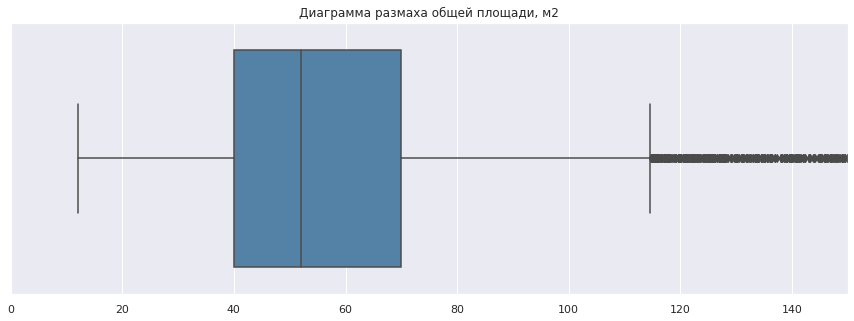

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


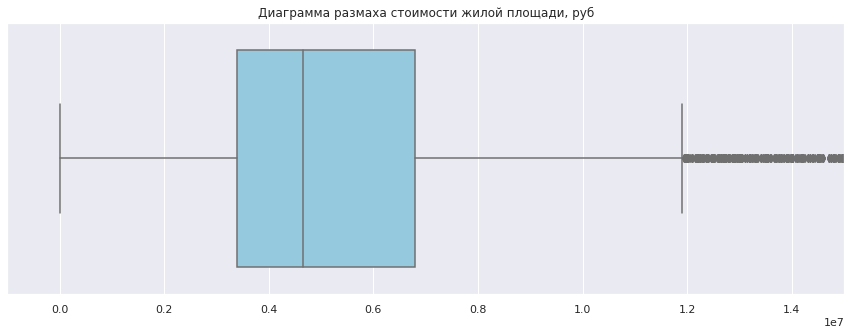

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


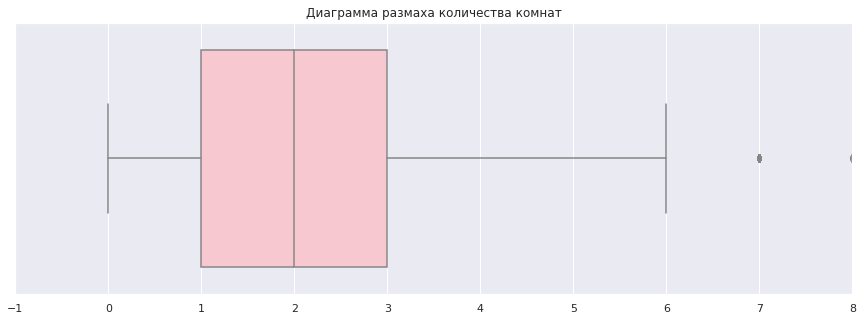

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


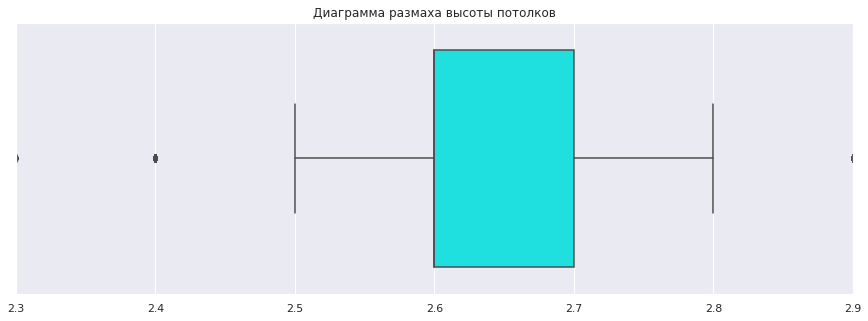

In [ ]:
#Построим диаграммы размаха

print('Медиана общей площади составляет: ', real_estate['total_area'].median())
print('Медиана цены составляет: ', real_estate['last_price'].median())
print('Медиана комнат составляет: ', real_estate['rooms'].median())
print('Медиана высота потолков составляет: ', real_estate['ceiling_height'].median())
print()

# создадим списки параметров
columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
title_list = ['Диаграмма размаха общей площади, м2', 'Диаграмма размаха стоимости жилой площади, руб', 
              'Диаграмма размаха количества комнат', 'Диаграмма размаха высоты потолков']
xlims = [(0, 150), (-1000000, 15000000), (-1, 8), (2.3, 2.9)]
color_list=['steelblue', 'skyblue', 'pink', 'cyan']
#цикл построения наших графиков с интересующими нас параметрами
for i in range(len(columns_list)):
    plt.figure(figsize=(15, 5))
    sns.boxplot(real_estate[columns_list[i]], color=color_list[i])
    plt.xlim(xlims[i])
    plt.title(title_list[i])
    plt.xlabel('') # для удаления названий столбцов
    plt.show()


**Почти среднестатистическая квартира**: площадью 52 квадратных метра, 2-ух комнатная, стоимостью 4,6 млн рублей, высота потолков 2.6 м


Давайте посмотрим гистограммы, помимо диаграмм размаха.

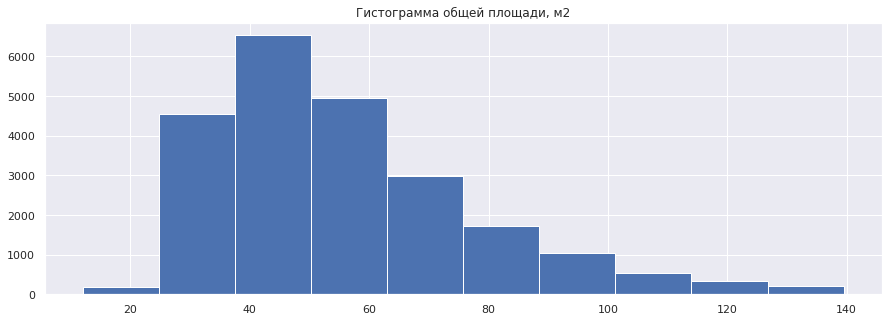

In [ ]:
real_estate['total_area'].hist(range=real_estate['total_area'].quantile([.0,.97])
                               , figsize=(15,5))
plt.title('Гистограмма общей площади, м2')
plt.show()


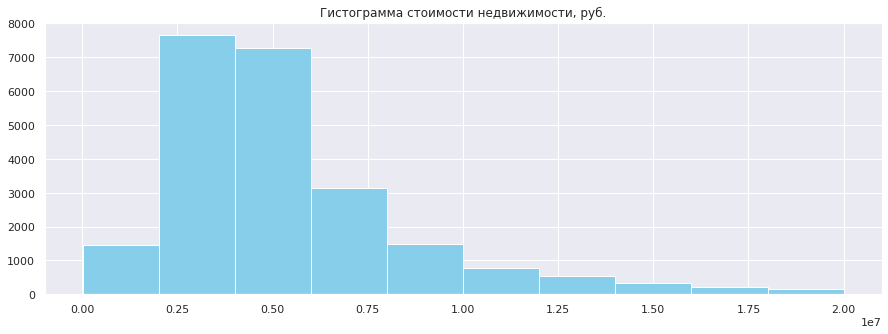

In [ ]:
real_estate['last_price'].hist(range=real_estate['last_price'].quantile([.0,.97]), 
                                    figsize=(15,5),
                                    color='skyblue')
plt.title('Гистограмма стоимости недвижимости, руб.')
plt.show()

In [ ]:
# Определим функцию построения гистограмм 

def hist_plot(dframe, colors):
    plot = dframe.hist(range=(dframe.quantile([.0, .99], 
                       interpolation='nearest')), 
                       figsize=(15,5), color=colors)

In [ ]:
hist_plot(real_estate['rooms'], 'pink')
plt.figsize=(15,5)
plt.title('Гистограмма количества комнат')
plt.show()

In [ ]:
hist_plot(real_estate['ceiling_height'], 'cyan')
plt.title('Гистограмма высоты потолков')
plt.show()

Большая часть квартир продается **от 30 до 80 квадратных метров**, свыше **115 квадратных метров** - редкие варианты, цена на квартиры - **от 3.5 до 15 млн**. Большая часть квартир продается по цене **от 3 до 6 млн**. **От 1 до 3 комнат**, выста потолков **от 2,5 до 3 метров**. Больше всего квартир имеют **высоту потолков 2,6 м**

Для ответа на окончательные вопросы давайте соберем отфильтрованные данные. По этим столбцам будем брать следующие параметры:

- цена от 1 200 000.00 до 15 000 000 млн рублей
- площадь от 12 до 125 кв.м
- потолок от 2.5 до 4 метров (потолки взяли с выбросами, для увеличения выборки)
- число комнта от 1 до 6

После проработки остальных столбцов соберем новый сет

#### Удаленность от центра

Проанализируем столбец удаленности от центра:

In [ ]:
real_estate[['citycenters_nearest']].describe()

In [ ]:
# построим диаграмму размаха
center_nearest_exp = real_estate.query('citycenters_nearest > 0')['citycenters_nearest']
plt.figure(figsize=(15, 5))
sns.boxplot(center_nearest_exp, color='steelblue')
plt.xlabel('Удаленность от центра')
plt.xlim(100, 30000)
plt.title('Диаграмма размаха для параметра "Удаленность от центра"')
plt.show()
print('Медиана составляет: ', center_nearest_exp.median())

**Нулевые значения мы отбросили**. Минимальная удаленность наблюдалась на расстоянии **181 м**. Медианная удаленность соcтавляет 13 км от центра города.

#### Время продажи квартиры. 
Изучим время продажи квартир. Опять же обратимся к методу describe()

In [ ]:
real_estate[['days_exposition']].describe()

Мы меняли NaN на 0, поэтому исключим их из выборки:

In [ ]:
days_exp = real_estate.query('days_exposition > 0')['days_exposition']

In [ ]:
# построим диаграмму размаха

plt.figure(figsize=(15, 5))
sns.boxplot(days_exp, color='steelblue')
plt.title('Диаграмма размаха параметра: Дней от публикации до снятия')
plt.xlim(0, 600)
print('Медиана составляет: ', days_exp.median())
plt.show()



In [ ]:
days_exp.hist(bins=30, range=(0, 150), figsize=(15, 5))
plt.title ('Гистограмма параметра: Дней от публикации до снятия')
plt.show()

**Среднее время продажи квартиры** - 156 дней, медианное время - 95 дней, при этом большая часть квартир продается за 45 дней либо 60 дней.

- По этому столбцу возьмем время продажи от 15 до 520 дней

#### Факторы влияющие на цену

Сделаем срез из обработанной таблицы для получения сета со значениями в рамках диаграмм размаха



In [ ]:
# good_df = real_estate.query('12 <= total_area <= 125 \
#                             and 1200000 <= last_price <= 15000000 \
#                             and 2.5 <= ceiling_height <= 4 \
#                             and 1 <= rooms <= 6 and 15 <= days_exposition <= 520')

good_df = real_estate [(real_estate['total_area'] >=12) & (real_estate['total_area'] <=125) & \
                      (real_estate['last_price'] >=1200000) & (real_estate['last_price'] <=15000000) & \
                      (real_estate['ceiling_height'] >=2.5) & (real_estate['ceiling_height'] <= 4) & \
                      (real_estate['rooms'] >=1) & (real_estate['rooms'] <= 6) & \
                      (real_estate['days_exposition'] >=15) & (real_estate['days_exposition'] <= 520)]
good_df.info()

Давайте посчитаем долю нашей выборки от начальной:

In [ ]:
print('Выборка для анализа составляет: {:.2%}'.format(len(good_df)/len(real_estate)))

При этом параллельно будет строить графики для основного сета для сравнения

In [ ]:
good_df_group = good_df[['total_area', 'last_price', 
                         'ceiling_height', 'rooms', 
                         'days_exposition', 'citycenters_nearest', 
                         'month','day', 'year','floor']]
good_df_group.corr()

In [ ]:
# построим тепловую карту, коэффициенты корреляции окгруглим до 1 знака
plt.figure(figsize=(15,15))
sns.heatmap(good_df_group.corr(), annot=True, cmap='mako', fmt='.1f')
plt.title('Тепловая карта корреляции')
plt.show()

**Высокое влияние оказывает: общая площадь**
Слабое влияние: количество комнат, высота потолков
У остальных параметров Очень слабое влияние

Комнаты могут быть различной площадью и площадь как итог не определяет, а на цену в общем случае влияет именно общая площадь помещения



Изучим поведение стоимости по таблице общей и нашему срезу.

In [ ]:
good_df.groupby('year')['last_price'].agg('median').plot(
    x='year', style='o-', xlim=(2014, 2020), figsize=(15, 5), legend = True
)


real_estate.groupby('year')['last_price'].agg('median').plot(
    x='year', style='o-', xlim=(2013, 2020), figsize=(15, 5), legend = True
)

plt.legend(['real_estate','good_df'])
plt.title('Изменение стоимости по годам')
plt.show()

Высокий пик приходится на 2014 год. Предполагаем, что это связано с опасениями граждан насчет своих сбережений и попыткой вложить свободные средства в покупку недвижимости, что вызвало рост цены, то есть как следствие повышенного спроса. Аналогичную тенденцию роста можно наблюдать в 2019 году

Изучим поведение цены по дням недели:

In [ ]:
good_df.groupby('day')['last_price'].agg('median').plot(
    x='day', style='o-', xlim=(-1, 7), figsize=(15, 5)
)
real_estate.groupby('day')['last_price'].agg('median').plot(
    x='day', style='o-', xlim=(-1, 7), figsize=(15, 5)
)
plt.legend(['real_estate','good_df'])
plt.title('Изменение стоимости по дням')
plt.show()

Особого влияния день недели не оказывает на цену, разброс достаточно небольшой, но стоит отметить, что цены в начале недели выше, нежели в конце

Посмотрим влияние месяца:

In [ ]:
good_df.groupby('month')['last_price'].agg('median').plot(
    x='month', style='o-', xlim=(0, 14), figsize=(15, 5)
)
real_estate.groupby('month')['last_price'].agg('median').plot(
    x='month', style='o-', xlim=(0, 14), figsize=(15, 5)
)
plt.legend(['real_estate','good_df'])
plt.title('Изменение стоимости по месяцам')
plt.show()

по месяцам, если рассматривать график не по срезу - лидирует апрель, но оба графика нам говорят, что к июню активность спадает, что связано с сезоном отпусков

In [ ]:
good_df.groupby('floor_cat')['last_price'].agg('median').plot(
     x='floor_cat', kind='pie', figsize=(11, 14), 
)
donut=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(donut)

plt.title('Медиана цен в зависимости от этажа. Дата сет good_df')
plt.show()


In [ ]:
real_estate.groupby('floor_cat')['last_price'].agg('median').plot(
     x='floor_cat', kind='pie', figsize=(11, 14), 
)
donut=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(donut)
plt.title('Медиана цен в зависимости от этажа. Дата сет real_estate')
plt.show()

Этаж не оказывает особого влияния на цену. Но можно обозначить, что этаж отличный от первого и последнего - дороже, последний дороже первого.

In [ ]:
good_df.groupby('rooms')['last_price'].agg('median').plot(
    x='rooms', style='o-', xlim=(0, 7), figsize=(15, 5)
)
plt.title('Медиана цен в зависимости от количества комнат')
plt.show()

С ростом числа комнат растет и цена. Ведь увеличивается площадь, соответственно это и вызывает такой закономерный рост

#### 10 населённых пунктов с наибольшим числом объявлений. 


Изучим топ-10 городов по количеству объявлений:

In [ ]:
top_10_loc = real_estate.pivot_table(index='locality_name', 
                                     values='price_of_sqm', 
                                     aggfunc=['count', 'mean']
                                    ).round(2)
top_10_loc.columns = ['adv', 'mean_price_for_sqm']
top = top_10_loc.sort_values(by='adv', ascending=False)[:10]
top.plot(y='adv', kind='pie', figsize=(15,10))
donut=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(donut)
plt.title('Топ-10 городов по количеству объявлений')
plt.show()
top


Из представленных городов, больше всего квартир продается в Санкт-Петербурге и цена за квадратный метр выше - почти **115 тыс за кв. м**. Замыкает наш рейтинг топ-10 - Выборг, при этом и цена ниже - **58 кв. м.**

#### Определение центральной области
Выделим сегмент квартир в центре. 

In [ ]:
real_estate ['citycenters_nearest_km'] = (real_estate['citycenters_nearest']/1000).round(0)
real_estate.head()


In [ ]:
spb_center = real_estate.query('citycenters_nearest_km > 0').pivot_table(index='citycenters_nearest_km', 
                                             values=['last_price'], 
                                             aggfunc='mean'
                                            ).plot(y='last_price', kind='line', figsize=(15,5),
                                             sharex=True, 
                                                  )

plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.title('')
plt.show()


**Центральная область располагается приблизитель в радиусе 8 км от центра, но нам необходимо подробнее рассмотреть график**. На расстоянии около 1 км наблюдается самая высокая цена. С 8-10 км начинается спад и стагнация. Также мы можем наблюдать рост цен на 43 км и 55 км, относительно привычных на данном расстоянии. Это может определяться либо размером жилой площади, либо количеством комнат либо статусом жилья как "элитное". Укрупним группу:

In [ ]:
spb_center_flat = real_estate.query('0 < citycenters_nearest_km <= 10').pivot_table(
                                            index='citycenters_nearest_km', 
                                             values=['last_price'], 
                                             aggfunc='mean'
                                            ).plot(y='last_price', kind='line', figsize=(15,5),
                                             sharex=True, 
                                                  )

plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

**Центром Санкт-Петербурга будем считать недвижимость удаленностью до 8 км**

Изучим выборку учитывая данные параметры - недвижимость в центре:

In [ ]:
real_estate_center = real_estate.query('0 < citycenters_nearest_km <= 8')
real_estate_center.head()


In [ ]:
# сделаем выборку нужных нам параметров для рассчета корреляции и построения тепловой карты:
real_estate_center_gr = real_estate_center [['total_area', 'last_price', 
                         'ceiling_height', 'rooms', 
                         'days_exposition', 'citycenters_nearest', 
                         'month','day', 'year','floor', 'citycenters_nearest_km']]
real_estate_center_gr.corr()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(real_estate_center_gr.corr(), annot=True, cmap='mako', fmt='.1f')
plt.title('Тепловая карта корреляции параметров недвижимости в центральной области Санкт-Петербурга')
plt.show()

Высокая корреляция наблюдается между количеством комнат и ценой. Площадь оказывает среднее влияние на цену на цену.

Квартиры в центре будут стоить выше аналогичных по параметрам из других областей. Проверим

Исключим из выборки недвижимость в центре и ограничимся пределами [КАД](https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%8F_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0#:~:text=%D0%9F%D1%80%D0%BE%D1%82%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0%20%D0%B2%20%D0%B0%D0%B4%D0%BC%D0%B8%D0%BD%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D1%85%20%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%86%D0%B0%D1%85,%D1%88.)

In [ ]:
real_estate_notcenter = real_estate.query('8 < citycenters_nearest_km <= 32')
real_estate_notcenter.head()


In [ ]:
real_estate_notcenter = real_estate_notcenter [['total_area', 'last_price', 
                         'ceiling_height', 'rooms', 
                         'days_exposition', 'citycenters_nearest', 
                         'month','day', 'year','floor', 'citycenters_nearest_km']]
real_estate_notcenter.corr()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(real_estate_notcenter.corr(), annot=True, cmap='mako', fmt='.1f')
plt.title('Тепловая карта корреляции параметров недвижимости за пределами центральной области Санкт-Петербурга')
plt.show()

Высокая корреляция наблюдается между количеством комнат и ценой. Площадь оказывает высокое влияние на цену, но меньшее чем комнаты. 

Таким образом, чем дальше от центра - тем меньше расстояние влияет. Там уже подключаются параметры транспортной доступности и т.п.

### Итог

Большая часть квартир продается **от 30 до 80 квадратных метров**, свыше 115 квадратных метров - редкие варианты, цена на квартиры - от 3.5 до 15 млн. Большая часть квартир продается по цене от **3 до 6 млн**. **От 1 до 3 комнат**, высота потолков от 2,5 до 3 метров. Больше всего квартир имеют высоту потолков **2,6 м**



**Среднестатистическая квартира**: площадью 52 квадратных метра, 2-ух комнатная, стоимостью 4,6 млн рублей, высота потолков 2.6 м


Квартиры в центре стоят дороже аналогичных квартир за пределами обозначенной области. За пределами КАД стоимость квартир силно ниже квартир Свереной столицы


Дни, год, месяц не сильно влияют на цену, но в июне наблюдается спад цен по причине падения спроса.


**Как итог:**


Сильное влияние на цену оказывает площади и максимальная близость к центру города, количество комнат также влияет на итоговую цену квартиры, но в связи с итоговой площадью; квартиры, замещенные в четверг и в целом - в будни - дороже тех, что размещены на выходных. В 2019 году наблюдается рост цен. лучший месяц для начала продажи - апрель, но ограницен снижением активности в июне и соответственно быстрой продажи не будет.

